In [38]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
data = pd.read_csv(r"C:\Users\karem\Downloads\first inten project.csv") 
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [41]:
data[data.duplicated() == True]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status


In [42]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'])
data['date of reservation'].dtype

ValueError: time data "2018-2-29" doesn't match format "%m/%d/%Y", at position 495. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [43]:
eror = data['date of reservation'].str.find("-")
eror = data.iloc[(eror[eror != -1]).index,15]
print(eror)
print("\n________________________________________________\n\n 2018-2-29 this day did not exist in reality. ")


2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
18380    2018-2-29
18534    2018-2-29
18680    2018-2-29
19013    2018-2-29
20419    2018-2-29
21674    2018-2-29
21688    2018-2-29
26108    2018-2-29
27559    2018-2-29
27928    2018-2-29
30552    2018-2-29
30616    2018-2-29
30632    2018-2-29
30839    2018-2-29
32041    2018-2-29
34638    2018-2-29
35481    2018-2-29
Name: date of reservation, dtype: object

________________________________________________

 2018-2-29 this day did not exist in reality. 


In [44]:
data['date of reservation'] = data['date of reservation'].str.replace("2018-2-29" , "3/1/2018")
data['date of reservation'] = pd.to_datetime(data['date of reservation'])
data['date of reservation'].dtype

dtype('<M8[ns]')

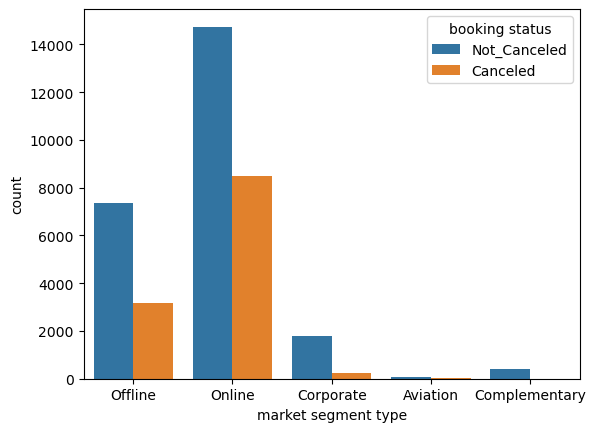

In [45]:
sns.countplot(data=data, x='market segment type', hue='booking status')
plt.show()

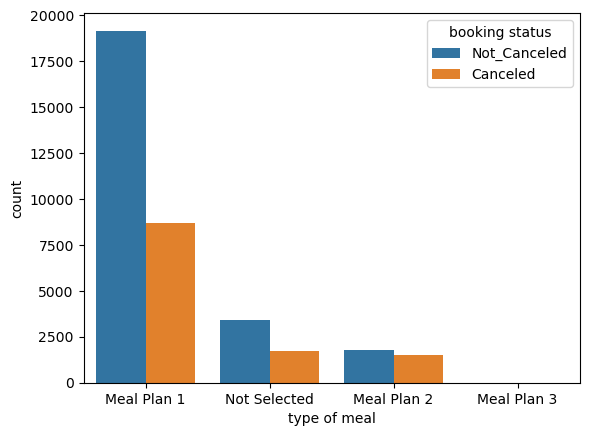

In [46]:
sns.countplot(data=data, x='type of meal', hue='booking status')
plt.show()

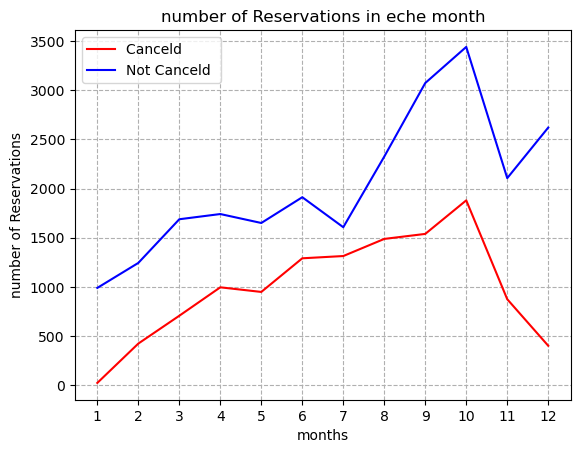

In [47]:
data["month"] = data['date of reservation'].dt.month
df = pd.crosstab(data['month'], data['booking status'])
plt.plot(df.index , df['Canceled'] , label = "Canceld ",color = "red" )
plt.plot(df.index , df['Not_Canceled'] ,label = "Not Canceld ", color = "blue")
plt.grid(True , linestyle='--')
plt.legend()
plt.title("number of Reservations in eche month")
plt.xlabel("months")
plt.ylabel('number of Reservations')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

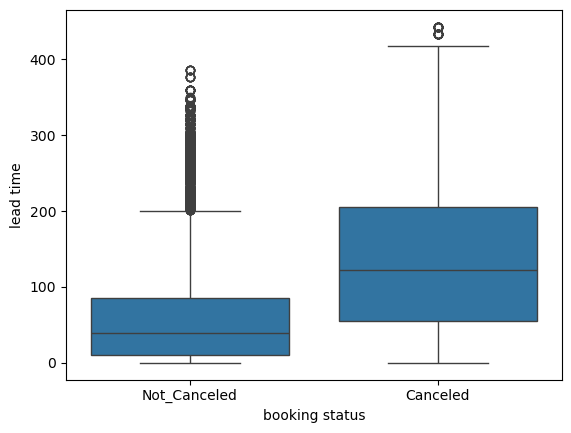

In [48]:
sns.boxplot(data=data, x='booking status', y='lead time')
plt.show()

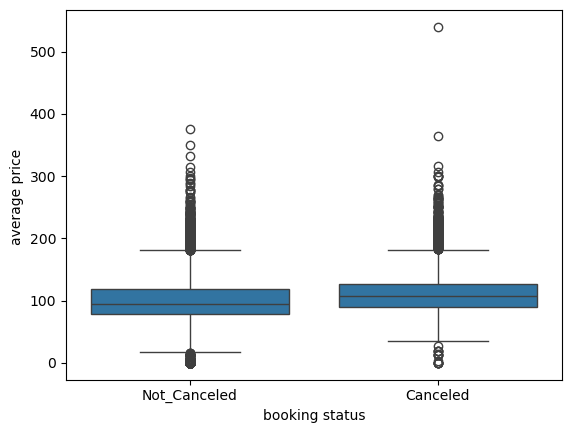

In [49]:
sns.boxplot(data=data, x='booking status', y='average price ')
plt.show()

In [50]:
le = LabelEncoder()
data['type of meal'] = le.fit_transform(data['type of meal'])
data['market segment type'] = le.fit_transform(data['market segment type'])
data['booking status'] = le.fit_transform(data['booking status'])
data['room type'] = le.fit_transform(data['room type'])
data.drop(['Booking_ID','month'] , inplace= True ,axis= 1)

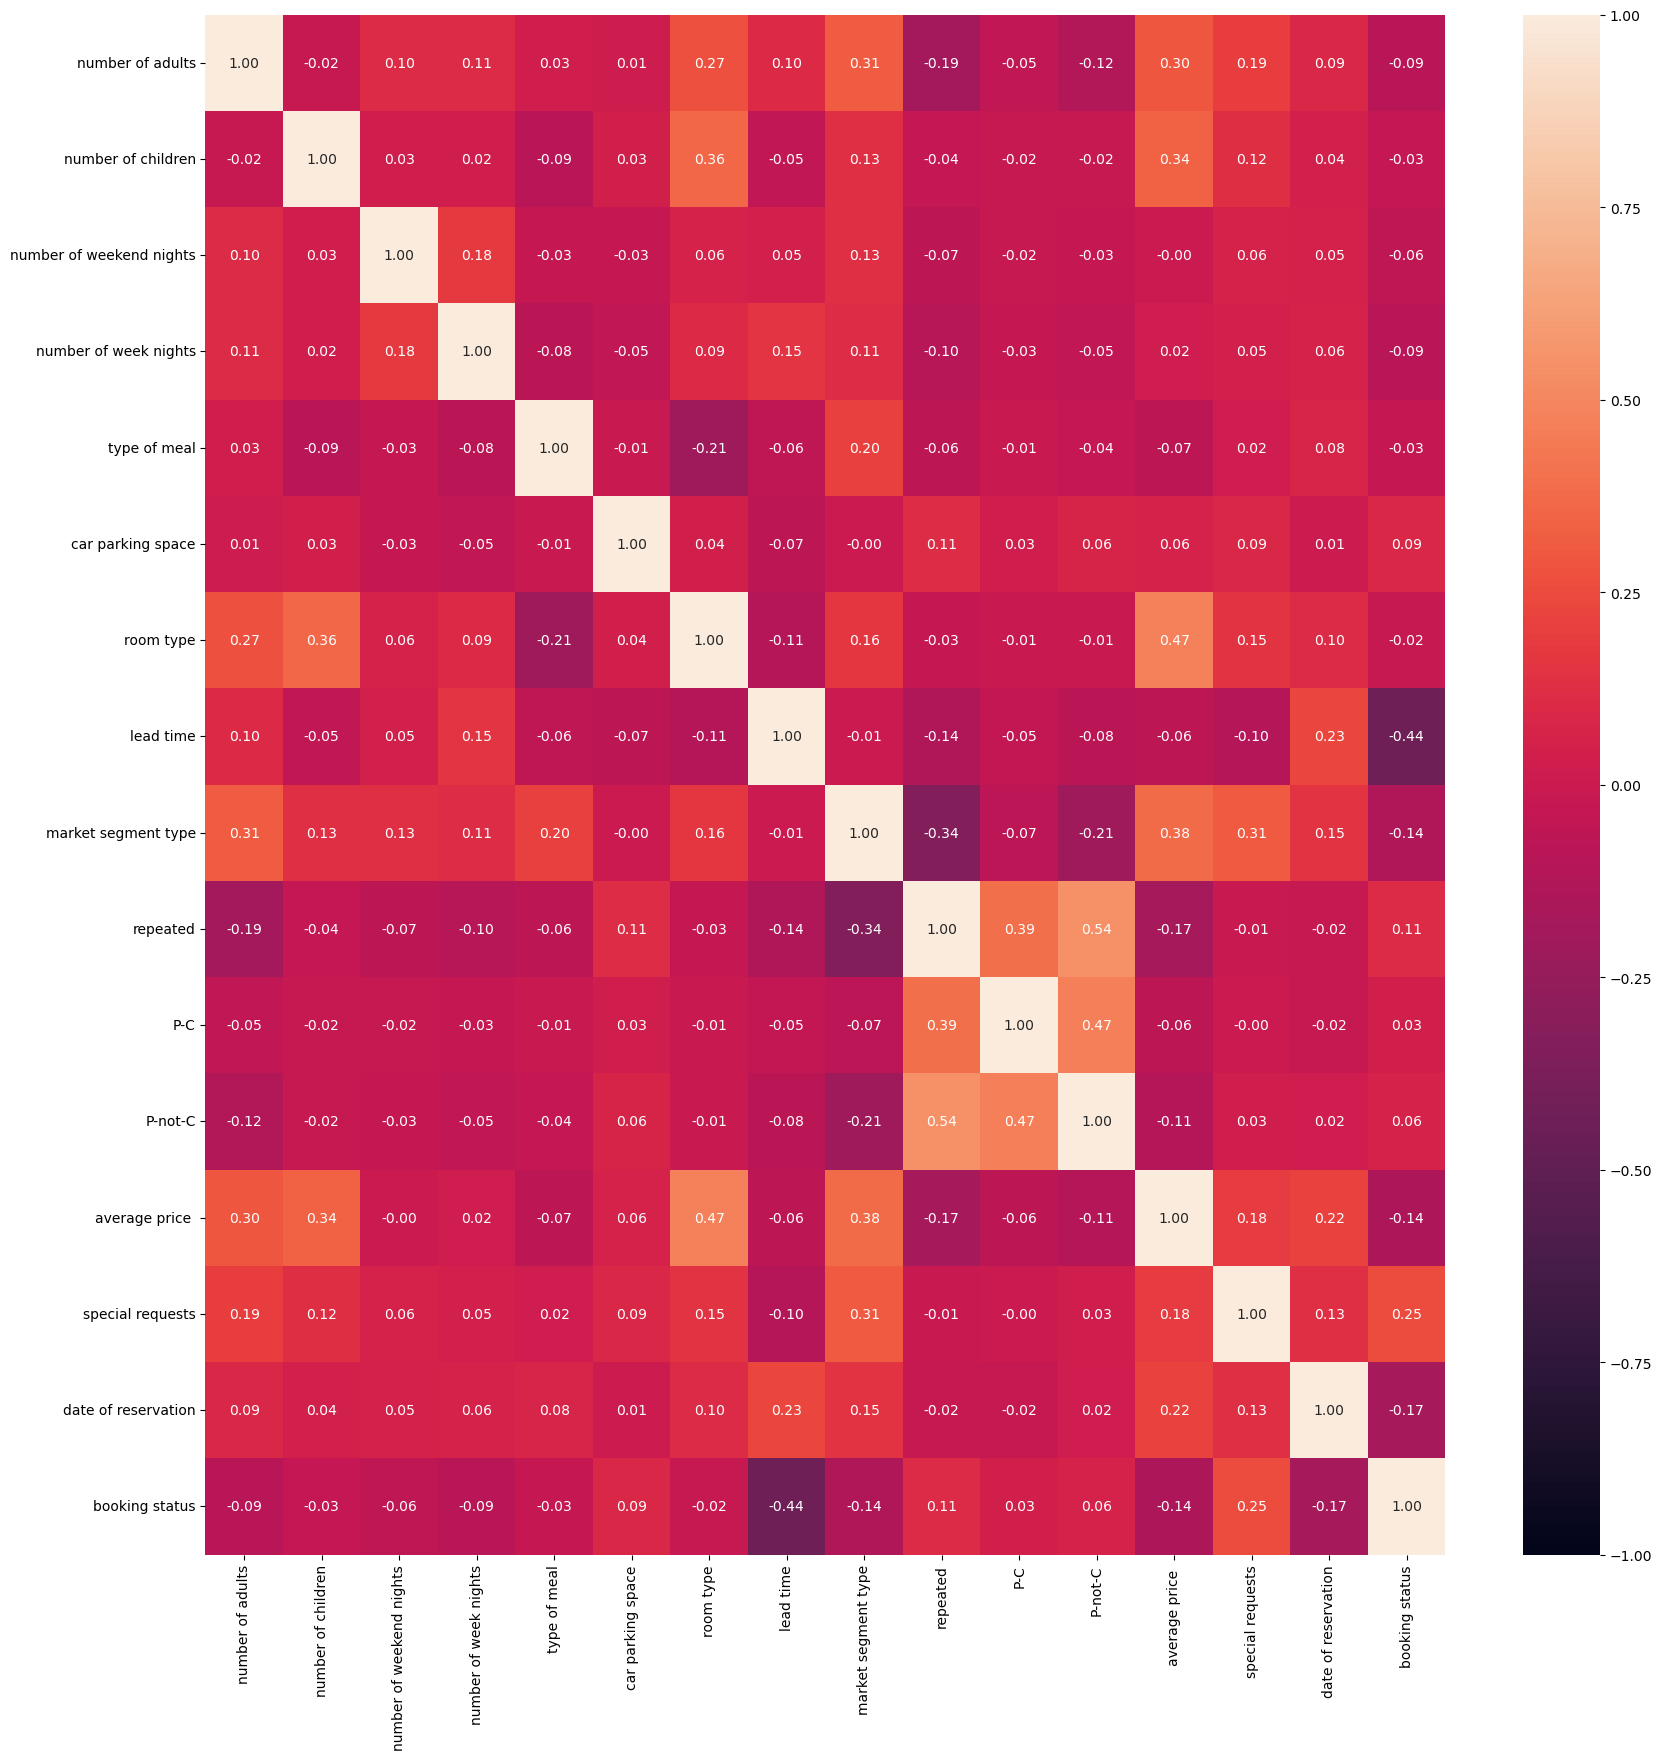

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() ,vmax=1,vmin=-1,annot=True , fmt=".2f")
plt.show()

In [52]:
data_traning =  data.loc[ :,[ 'type of meal','repeated','car parking space','lead time', 'market segment type', 'average price ', 'special requests']]
targetcolum = data['booking status']
data_traning

,type of meal,repeated,car parking space,lead time,market segment type,average price,special requests
0,0,0,0,224,3,88.00,0
1,3,0,0,5,4,106.68,1
2,0,0,0,1,4,50.00,0
3,0,0,0,211,4,100.00,1
4,3,0,0,48,4,77.00,0
...,...,...,...,...,...,...,...
36280,1,0,0,346,4,115.00,1
36281,0,0,0,34,4,107.55,1
36282,0,0,0,83,4,105.61,1
36283,0,0,0,121,3,96.90,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data_traning, targetcolum, test_size=0.3, random_state=42)

In [54]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred )
print(report)
print(confusion_matrix(y_test, y_pred))

{'0': {'precision': 0.7354345749761223, 'recall': 0.6427378964941569, 'f1-score': 0.6859688195991092, 'support': 3594.0}, '1': {'precision': 0.8342156229825693, 'recall': 0.886039495337356, 'f1-score': 0.859346944204296, 'support': 7292.0}, 'accuracy': 0.80571376079368, 'macro avg': {'precision': 0.7848250989793458, 'recall': 0.7643886959157564, 'f1-score': 0.7726578819017026, 'support': 10886.0}, 'weighted avg': {'precision': 0.8016031770395994, 'recall': 0.80571376079368, 'f1-score': 0.8021063618204046, 'support': 10886.0}}
[[2310 1284]
 [ 831 6461]]


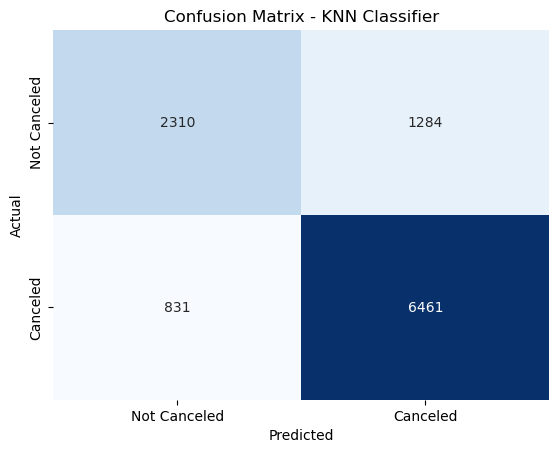

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['Not Canceled', 'Canceled'],yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()